# Capstone Project: Sleep Disorder

## Import Semua Packages/Library yang Digunakan

In [1]:
# Memanggil semua packages / library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping
import kagglehub
import zipfile
import os
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

## Data Wrangling

### Gathering Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

# Tentukan direktori dataset
dataset_dir = path

# Mencari file CSV di dalam semua sub-direktori
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_file_path = os.path.join(root, file)
            print("File CSV ditemukan:", csv_file_path)
            data_df = pd.read_csv(csv_file_path)
            print(data_df.head())
            break

100%|██████████| 2.54k/2.54k [00:00<00:00, 4.00MB/s]

Extracting files...
File CSV ditemukan: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2/Sleep_health_and_lifestyle_dataset.csv
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8  

In [3]:
# Memuat tabel data pada file day.csv
data_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Assessing Data

In [4]:
# memeriksa tipe data dari tiap kolom dalam day_df.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# mengecek apakah ada missing value di day_df
data_df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [6]:
# mengecek apakah ada duplikasi di day_df
print("Jumlah duplikasi: ", data_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# mengecek parameter statistik dari kolom numerik dalam day_df
data_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Person ID,374.0,NaN,NaN,NaN,187.5,108.108742,1.0,94.25,187.5,280.75,374.0
Gender,374,2,Male,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,374.0,NaN,NaN,NaN,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Occupation,374,11,Nurse,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Duration,374.0,NaN,NaN,NaN,7.132086,0.795657,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,374.0,NaN,NaN,NaN,7.312834,1.196956,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,374.0,NaN,NaN,NaN,59.171123,20.830804,30.0,45.0,60.0,75.0,90.0
Stress Level,374.0,NaN,NaN,NaN,5.385027,1.774526,3.0,4.0,5.0,7.0,8.0
BMI Category,374,4,Normal,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Pressure,374,25,130/85,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Data

In [9]:
# akan menghapus kolom Person ID karena tidak akan kita olah datanya
data_df.drop(['Person ID'], axis = 1, inplace= True)

In [10]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
data_df.rename(columns={'BMI Category':'BMI_Category','Sleep Disorder':'Sleep_Disorder',"Sleep Duration":"Sleep_Duration","Quality of Sleep":"Quality_of_Sleep","Physical Activity Level":"Physical_Activity_Level", "Stress Level":"Stress_Level","Blood Pressure":"Blood_Pressure", "Heart Rate":"Heart_Rate", "Daily Steps":"Daily_Steps"},inplace=True)

In [11]:
# akan mengubah input data season, month, dan year dari integer / float menjadi string / kategori
#columns = ['Gender', 'BMI_Category', 'Sleep_Disorder']

#for column in columns:
    #data_df[column] =  data_df[column].astype("category")

In [12]:
data_df[['Systolic', 'Diastolic']] = data_df['Blood_Pressure'].str.split('/', expand=True).astype(int)

In [13]:
data_df.drop(['Blood_Pressure'], axis = 1, inplace= True)

In [14]:
data_df['Sleep_Disorder'] = data_df['Sleep_Disorder'].fillna('None')

In [15]:
# mengganti isi kolom dengan input aslinya

# mengganti data gender menjadi: Male:1, Female:2
data_df.Gender.replace(("Male", "Female"), (1,2), inplace=True)

# mengganti data sleep disorder menjadi: 1:None, 2:Sleep Apnea, 3:Insomnia
data_df.Sleep_Disorder.replace(("None", "Sleep Apnea", "Insomnia"),(0,1,2), inplace=True)

# mengganti data BMI menjadi: 1:Normal 2: Normal Weigt, 3: Over Weight, 4: Obese
data_df.BMI_Category.replace(("Normal", "Normal Weight", "Overweight", "Obese"), (1,2,3,4), inplace=True)

data_df.Occupation.replace(('Software Engineer','Doctor','Sales Representative','Teacher','Nurse','Engineer','Accountant','Scientist','Lawyer','Salesperson','Manager'), (1,2,3,4,5,6,7,8,9,10,11), inplace=True)

<ipython-input-15-ed8e51540b49>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df.Gender.replace(("Male", "Female"), (1,2), inplace=True)
<ipython-input-15-ed8e51540b49>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df.Gender.replace(("Male", "Female"), (1,2), inplace=True)
<ipython-i

In [16]:
# akan mengubah input data season, month, dan year dari integer / float menjadi string / kategori
columns = ['Gender', 'BMI_Category', 'Sleep_Disorder', 'Occupation']

for column in columns:
    data_df[column] =  data_df[column].astype(int)

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [17]:
# menampilkan rangkuman parameter statistik pada data hour_df
data_df.describe(include="all")

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,1.494652,42.184492,5.614973,7.132086,7.312834,59.171123,5.385027,1.927807,70.165775,6816.844920,0.620321,128.553476,84.649733
std,0.500641,8.673133,2.560033,0.795657,1.196956,20.830804,1.774526,1.010734,4.135676,1617.915679,0.805620,7.748118,6.161611
min,1.000000,27.000000,1.000000,5.800000,4.000000,30.000000,3.000000,1.000000,65.000000,3000.000000,0.000000,115.000000,75.000000
25%,1.000000,35.250000,4.000000,6.400000,6.000000,45.000000,4.000000,1.000000,68.000000,5600.000000,0.000000,125.000000,80.000000
50%,1.000000,43.000000,5.000000,7.200000,7.000000,60.000000,5.000000,1.000000,70.000000,7000.000000,0.000000,130.000000,85.000000
75%,2.000000,50.000000,7.000000,7.800000,8.000000,75.000000,7.000000,3.000000,72.000000,8000.000000,1.000000,135.000000,90.000000
max,2.000000,59.000000,11.000000,8.500000,9.000000,90.000000,8.000000,4.000000,86.000000,10000.000000,2.000000,142.000000,95.000000


In [18]:
# memeriksa tipe data dari tiap kolom dalam day_df.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep_Duration           374 non-null    float64
 4   Quality_of_Sleep         374 non-null    int64  
 5   Physical_Activity_Level  374 non-null    int64  
 6   Stress_Level             374 non-null    int64  
 7   BMI_Category             374 non-null    int64  
 8   Heart_Rate               374 non-null    int64  
 9   Daily_Steps              374 non-null    int64  
 10  Sleep_Disorder           374 non-null    int64  
 11  Systolic                 374 non-null    int64  
 12  Diastolic                374 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 38.1 KB


## Machine Learning

In [19]:
no_sleep_disorder = data_df[data_df['Sleep_Disorder'] == 0]
sleep_apnea = data_df[data_df['Sleep_Disorder'] == 1]
insomnia = data_df[data_df['Sleep_Disorder'] == 2]

no_sleep_disorder = no_sleep_disorder.sample(insomnia.shape[0], random_state=1)
sleep_apnea = sleep_apnea.sample(insomnia.shape[0], random_state=1)

data_df = pd.concat([no_sleep_disorder, sleep_apnea, insomnia], axis=0)
data_df['Sleep_Disorder'].value_counts()

,count
Sleep_Disorder,
0,77
1,77
2,77


In [20]:
# Pisahkan fitur (X) dan target (y)
X = data_df[['Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep',
             'Physical_Activity_Level', 'Stress_Level', 'BMI_Category', 'Heart_Rate',
             'Daily_Steps', 'Systolic', 'Diastolic']].values
X = X.astype(int)
# Pisahkan target y (Sleep_Disorder)
y = data_df['Sleep_Disorder'].values

In [21]:
len(np.unique(y))

3

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [23]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()

# Menormalkan hanya fitur numerik
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [24]:
print(scaler.mean_)

[1.56521739e+00 4.41594203e+01 5.84057971e+00 6.63043478e+00
 7.10144928e+00 5.94420290e+01 5.63768116e+00 2.30434783e+00
 7.09202899e+01 6.85072464e+03 1.31275362e+02 8.68333333e+01]


In [25]:
print(scaler.var_)

[2.45746692e-01 7.53803823e+01 6.23545474e+00 6.53276623e-01
 1.61289645e+00 4.41724900e+02 3.46292796e+00 9.79836169e-01
 1.93921970e+01 3.12191976e+06 5.89096828e+01 4.04867150e+01]


In [26]:
# Membuat model Sequential dengan layer Dense
# Membuat model Sequential dengan layer Dense
model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    # Hidden Layer pertama dengan Dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # Hidden Layer kedua dengan Dropout
    tf.keras.layers.Dense(10, activation='relu'),
    # Output Layer
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# compile model
optimizer_pick = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer_pick,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [27]:
# Definisikan custom callback
class EarlyStoppingCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get("accuracy")
        val_acc = logs.get("val_accuracy")

        # Mengecek apakah akurasi pelatihan dan validasi lebih dari 90%
        if train_acc >= 0.95 and val_acc >= 0.80:
            self.model.stop_training = True

            print("\nReached 95% train accuracy and 80% validation accuracy, so cancelling training!")

# EarlyStopping untuk menghentikan pelatihan berdasarkan loss atau akurasi
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model and save the training history
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStoppingCallback()])

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - accuracy: 0.4373 - loss: 1.0865 - val_accuracy: 0.4783 - val_loss: 1.0054
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4805 - loss: 0.9951 - val_accuracy: 0.4783 - val_loss: 0.9419
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.4676 - loss: 0.9422 - val_accuracy: 0.5870 - val_loss: 0.8989
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6844 - loss: 0.8922 - val_accuracy: 0.5870 - val_loss: 0.8604
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6378 - loss: 0.8707 - val_accuracy: 0.5870 - val_loss: 0.8240
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6777 - loss: 0.7983 - val_accuracy: 0.5870 - val_loss: 0.7905
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6433 - loss: 0.8038 - val_accuracy: 0.7609 - val_loss: 0.7600
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7851 - loss: 0.7234 - val_accuracy: 0.7391 - val_loss

In [28]:
model.save('./model_sleep/sleep_disorder_model(val_acc87_1).h5')

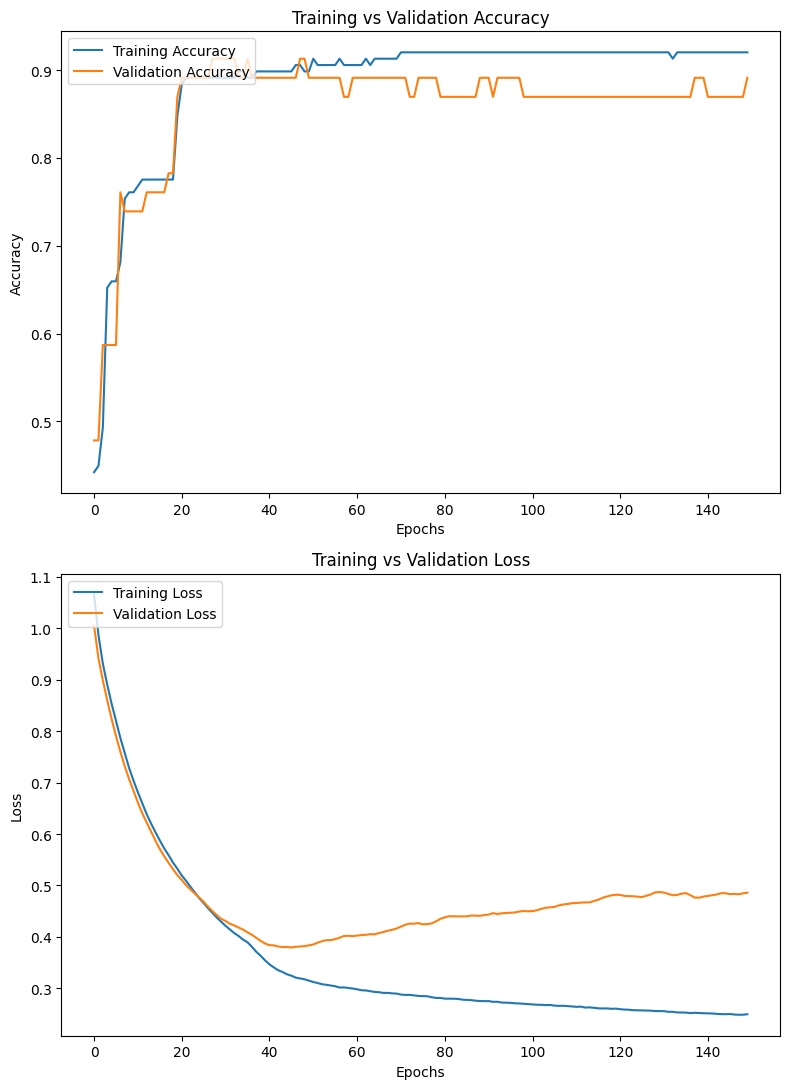

In [29]:
# Mengambil data dari history
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Membuat plot
plt.figure(figsize=(8, 11))

# Subplot pertama: Training vs Validation Accuracy
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')

# Subplot kedua: Training vs Validation Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Loss')

# Menampilkan grafik
plt.tight_layout()  # Mengatur jarak antar subplot agar tidak tumpang tindih
plt.show()

In [30]:
# Melakukan prediksi
predictions = model.predict(X_test)

# Mengambil kelas dengan probabilitas tertinggi
predicted_classes = np.argmax(predictions, axis=-1)
print(predicted_classes)
print(' ')
print(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[2 0 0 2 0 2 0 2 1 1 2 0 0 2 2 1 1 0 2 2 1 2 2 0 1 0 1 1 1 1 2 0 2 0 0 1 0
 1 1 1 1 2 1 0 1 0 0]
 
[2 0 0 2 0 2 0 2 2 1 2 0 1 2 2 1 1 0 2 2 1 2 2 2 1 0 1 1 1 1 2 0 1 0 0 1 2
 1 1 1 1 2 1 0 1 1 1]


In [31]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8695 - loss: 0.5414


[0.6610738635063171, 0.8510638475418091]

In [32]:
differences = predicted_classes != y_test  # Boolean array untuk hasil perbandingan
num_differences = np.sum(differences)  # Hitung total perbedaan
percentage_differences = (num_differences / len(y_test)) * 100  # Hitung persentase prediksi yang berbeda

# Menampilkan hasil
print(f"Jumlah prediksi yang berbeda: {num_differences}")
print(f"Persentase prediksi yang berbeda: {percentage_differences:.2f}%")

# Menampilkan kelas yang berbeda (opsional)
different_indices = np.where(differences)[0]  # Indeks di mana berbeda
print(f"Prediksi yang salah: {predicted_classes[different_indices]}")
print(f"Label sebenarnya: {y_test[different_indices]}")

Jumlah prediksi yang berbeda: 7
Persentase prediksi yang berbeda: 14.89%
Prediksi yang salah: [1 0 0 2 0 0 0]
Label sebenarnya: [2 1 2 1 2 1 1]


In [33]:
len(y_test)
#len(X)

47

In [34]:
occupation_mapping = {'Software Engineer': 1,
                      'Doctor': 2,
                      'Sales Representative': 3,
                      'Teacher': 4,
                      'Nurse': 5,
                      'Engineer': 6,
                      'Accountant': 7,
                      'Scientist': 8,
                      'Lawyer': 9,
                      'Salesperson': 10,
                      'Manager': 11}

gender_mapping = {'Female': 1,
                  'Male': 2}

disorder_mapping = {
    0: "No Sleep Disorder",
    1: "Sleep Apnea",
    2: "Insomnia"}

solution_mapping = {
    0: "Solution for No Sleep Disorder.",
    1: "Solution for Sleep Apnea.",
    2: "Solution for Insomnia."}

def calculate_bmi_category(bmi):
    if bmi <= 24.9:
        return 1
    elif 25 <= bmi <= 29.9:
        return 2
    else:
        return 3

In [35]:
def predict_with_input(model):

    # user input
    print("Masukkan nilai untuk fitur:")
    gender = str(input("Gender: "))
    gender = gender_mapping.get(gender, -1)
    if gender == -1:
        print("Gender tidak valid. Silakan gunakan encoding yang sesuai.")
        return

    age = int(input("Age: "))
    hours_of_sleep = float(input("Hours of Sleep: "))
    quality_of_sleep = int(input("Quality of Sleep: "))

    occupation = str(input("Occupation: "))
    occupation = occupation_mapping.get(occupation, -1)
    if occupation == -1:
        print("Occupation tidak valid. Silakan gunakan encoding yang sesuai.")
        return

    activity_level = int(input("Activity Level: "))
    stress_level = int(input("Stress Level: "))

    weight = float(input("Weight (kg): "))
    height = float(input("Height (cm): "))
    bmi = weight / ((height / 100) ** 2)
    bmi = calculate_bmi_category(bmi)

    heart_rate = int(input("Heart Rate: "))
    daily_steps = int(input("Daily Steps: "))
    systolic = int(input("Sistolic: "))
    diastolic = int(input("Diastolic: "))

    # fit transform
    input_data = np.array([[gender, age, hours_of_sleep, quality_of_sleep, occupation, activity_level, stress_level,
                            bmi, heart_rate, daily_steps, systolic, diastolic]])
    input_data = scaler.transform(input_data)

    # model predict
    predictions = model.predict(input_data)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)

    # output
    print(f"Hasil Prediksi: Kelas {predicted_class}")

    # nilai sleep disorder
    if predicted_class in disorder_mapping:
        print(f"Prediksi: {disorder_mapping[predicted_class]}")
    else:
        print("Kelas prediksi tidak memiliki solusi yang sesuai.")

    # solution sleep disorder
    if predicted_class in solution_mapping:
        print(f"Solusi Tidur: {solution_mapping[predicted_class]}")
    else:
        print("Kelas prediksi tidak memiliki solusi yang sesuai.")

predict_with_input(model)

Masukkan nilai untuk fitur:
Gender: Female
Age: 7
Hours of Sleep: 8
Quality of Sleep: 8
Occupation: Doctor
Activity Level: 9
Stress Level: 2
Weight (kg): 43
Height (cm): 150
Heart Rate: 80
Daily Steps: 700
Sistolic: 80
Diastolic: 60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Hasil Prediksi: Kelas 0
Prediksi: No Sleep Disorder
Solusi Tidur: Solution for No Sleep Disorder.


In [36]:
from tensorflow.keras.models import load_model

model_load = load_model('./model_sleep/sleep_disorder_model(val_acc87_1).h5')

In [37]:
model_load.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,277 (12.80 KB)

 Trainable params: 3,275 (12.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [38]:
model_load.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8695 - loss: 0.5414  


[0.6610738635063171, 0.8510638475418091]

In [39]:
def predict_with_input(model_load):

    # user input
    print("Masukkan nilai untuk fitur:")
    gender = str(input("Gender: "))
    gender = gender_mapping.get(gender, -1)
    if gender == -1:
        print("Gender tidak valid. Silakan gunakan encoding yang sesuai.")
        return

    age = int(input("Age: "))
    hours_of_sleep = float(input("Hours of Sleep: "))
    quality_of_sleep = int(input("Quality of Sleep: "))

    occupation = str(input("Occupation: "))
    occupation = occupation_mapping.get(occupation, -1)
    if occupation == -1:
        print("Occupation tidak valid. Silakan gunakan encoding yang sesuai.")
        return

    activity_level = int(input("Activity Level: "))
    stress_level = int(input("Stress Level: "))

    weight = float(input("Weight (kg): "))
    height = float(input("Height (cm): "))
    bmi = weight / ((height / 100) ** 2)
    bmi = calculate_bmi_category(bmi)

    heart_rate = int(input("Heart Rate: "))
    daily_steps = int(input("Daily Steps: "))
    systolic = int(input("Sistolic: "))
    diastolic = int(input("Diastolic: "))

    # fit transform
    input_data = np.array([[gender, age, hours_of_sleep, quality_of_sleep, occupation, activity_level, stress_level,
                            bmi, heart_rate, daily_steps, systolic, diastolic]])
    input_data = scaler.transform(input_data)

    # model predict
    predictions = model_load.predict(input_data)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)

    # output
    print(f"Hasil Prediksi: Kelas {predicted_class}")

    # nilai sleep disorder
    if predicted_class in disorder_mapping:
        print(f"Prediksi: {disorder_mapping[predicted_class]}")
    else:
        print("Kelas prediksi tidak memiliki solusi yang sesuai.")

    # solution sleep disorder
    if predicted_class in solution_mapping:
        print(f"Solusi Tidur: {solution_mapping[predicted_class]}")
    else:
        print("Kelas prediksi tidak memiliki solusi yang sesuai.")

predict_with_input(model_load)

Masukkan nilai untuk fitur:
Gender: Male
Age: 9
Hours of Sleep: 9
Quality of Sleep: 9
Occupation: Teacher
Activity Level: 5
Stress Level: 1
Weight (kg): 90
Height (cm): 170
Heart Rate: 70
Daily Steps: 800
Sistolic: 80
Diastolic: 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Hasil Prediksi: Kelas 0
Prediksi: No Sleep Disorder
Solusi Tidur: Solution for No Sleep Disorder.


In [40]:
# DEPLOY TO TFLITE

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model_load)
tflite_model = tf_lite_converter.convert()

Saved artifact at '/tmp/tmpb7obe4u3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140646379361504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140646379366432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140646379390224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140646379394976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140646379398496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140646379399376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140646379405008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140646379404128: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [41]:
tflite_name = 'tf_lite_model.tflite'

with open(tflite_name, 'wb') as f:
  f.write(tflite_model)